This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
# page 146
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.5987 - accuracy: 0.8165 - val_loss: 0.3467 - val_accuracy: 0.8928
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2519 - accuracy: 0.9228 - val_loss: 0.2598 - val_accuracy: 0.9193
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1660 - accuracy: 0.9480 - val_loss: 0.1763 - val_accuracy: 0.9454
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1202 - accuracy: 0.9618 - val_loss: 0.1767 - val_accuracy: 0.9431
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.1305 - val_accuracy: 0.9635
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.1614 - val_accuracy: 0.9523
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.1233 - val_accuracy: 0.9668
Epoch

**Plotting a validation accuracy comparison**

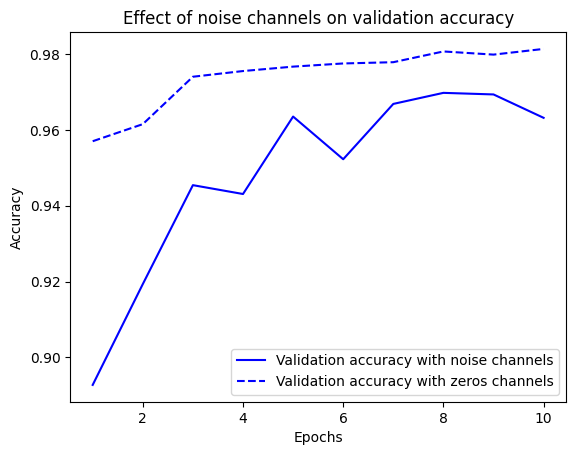

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
# plt.savefig("../pngs/5ch/noise.png")
# plt.close()
plt.show()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
# page 152
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3149 - accuracy: 0.1053 - val_loss: 2.3048 - val_accuracy: 0.1025
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2993 - accuracy: 0.1160 - val_loss: 2.3120 - val_accuracy: 0.0984
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2915 - accuracy: 0.1264 - val_loss: 2.3137 - val_accuracy: 0.1025
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2800 - accuracy: 0.1399 - val_loss: 2.3251 - val_accuracy: 0.1024
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2647 - accuracy: 0.1509 - val_loss: 2.3303 - val_accuracy: 0.1055
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2448 - accuracy: 0.1664 - val_loss: 2.3462 - val_accuracy: 0.1033
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2219 - accuracy: 0.1761 - val_loss: 2.3605 - val_accuracy: 0.1022

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

In [6]:
# num_validation_samples = 10000
# np.random.shuffle(data)
# validation_data = data[:num_validation_samples]
# data = data[num_validation_samples:]
# model = get_model()
# model.fit(data, labels,
#             epochs=50,
#             batch_size=128,
#             validation_data=(validation_data, validation_labels))
# validation_score = model.evaluate(validation_data, validation_labels)
# model = get_model()
# model.fit(np.concatenate([training_data, validation_data]),
#             np.concatenate([training_labels, validation_labels]),
#             epochs=50,
#             batch_size=128)
# test_score = model.evaluate(test_data, test_labels)

#### K-fold validation

In [7]:
# note test dada always separate from train data and validation data
# num_validation_samples = 10000
# np.random.shuffle(data)
# validation_data = data[:num_validation_samples]
# data = data[num_validation_samples:]
# k = 4
# num_validation_samples = len(data) // k
# np.random.shuffle(data)
# validation_scores = []
# for fold in range(k):
#     validation_data = data[num_validation_samples * fold:
#                            num_validation_samples * (fold + 1)]
#     training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):]
#     model = get_model()
#     model.fit(training_data, training_targets,
#               epochs=10, batch_size=1, verbose=0)
#     validation_score = model.evaluate(validation_data, validation_targets, verbose=0)
#     validation_scores.append(validation_score)
# validation_score = np.average(validation_scores)
# model = get_model()
# model.fit(data, targets,
#             epochs=10, batch_size=1, verbose=0)
# test_score = model.evaluate(test_data, test_targets, verbose=0)


#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 503.7573 - accuracy: 0.3787 - val_loss: 2.6822 - val_accuracy: 0.2858
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 4.3006 - accuracy: 0.2432 - val_loss: 2.2278 - val_accuracy: 0.2059
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0438 - accuracy: 0.2289 - val_loss: 2.2718 - val_accuracy: 0.2754
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3180 - accuracy: 0.2253 - val_loss: 2.2224 - val_accuracy: 0.2189
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3638 - accuracy: 0.2269 - val_loss: 2.2420 - val_accuracy: 0.2120
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4866 - accuracy: 0.2299 - val_loss: 2.1760 - val_accuracy: 0.2529
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5406 - accuracy: 0.2517 - val_loss: 2.2445 - val_accuracy: 0.2122
Epoc

**The same model with a more appropriate learning rate**

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3389 - accuracy: 0.9128 - val_loss: 0.1542 - val_accuracy: 0.9532
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1267 - accuracy: 0.9644 - val_loss: 0.1328 - val_accuracy: 0.9679
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0978 - accuracy: 0.9736 - val_loss: 0.1323 - val_accuracy: 0.9707
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0788 - accuracy: 0.9796 - val_loss: 0.1622 - val_accuracy: 0.9706
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9824 - val_loss: 0.1761 - val_accuracy: 0.9698
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.9852 - val_loss: 0.1718 - val_accuracy: 0.9704
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0491 - accuracy: 0.9876 - val_loss: 0.1904 - val_accuracy: 0.9695
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [10]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6802 - accuracy: 0.8295 - val_loss: 0.3638 - val_accuracy: 0.9029
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3525 - accuracy: 0.9036 - val_loss: 0.3086 - val_accuracy: 0.9151
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3176 - accuracy: 0.9124 - val_loss: 0.2921 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3013 - accuracy: 0.9159 - val_loss: 0.2850 - val_accuracy: 0.9197
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2918 - accuracy: 0.9185 - val_loss: 0.2789 - val_accuracy: 0.9224
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2852 - accuracy: 0.9201 - val_loss: 0.2759 - val_accuracy: 0.9242
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2805 - accuracy: 0.9220 - val_loss: 0.2722 - val_accuracy: 0.9252
Epoch 

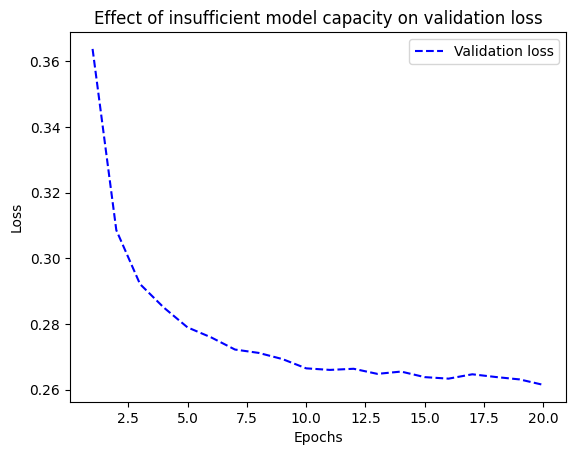

In [12]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("../pngs/5ch/insufficient.png")
# plt.close()
plt.show()

In [13]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3608 - accuracy: 0.8981 - val_loss: 0.1875 - val_accuracy: 0.9448
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1606 - accuracy: 0.9526 - val_loss: 0.1361 - val_accuracy: 0.9595
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1137 - accuracy: 0.9660 - val_loss: 0.1195 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.0987 - val_accuracy: 0.9710
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.1016 - val_accuracy: 0.9710
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0585 - accuracy: 0.9824 - val_loss: 0.0959 - val_accuracy: 0.9714
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0948 - val_accuracy: 0.9745
Epoch 

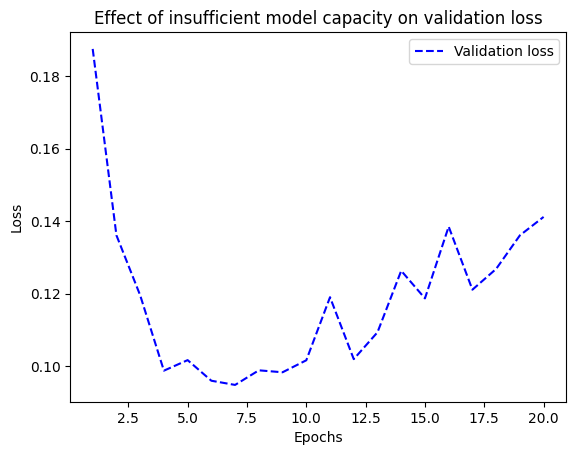

In [15]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("../pngs/5ch/sufficient.png")
# plt.close()
plt.show()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [16]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5343 - accuracy: 0.7842 - val_loss: 0.4123 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3404 - accuracy: 0.8917 - val_loss: 0.3242 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2546 - accuracy: 0.9157 - val_loss: 0.2856 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2029 - accuracy: 0.9333 - val_loss: 0.3043 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1725 - accuracy: 0.9435 - val_loss: 0.2741 - val_accuracy: 0.8900
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1448 - accuracy: 0.9540 - val_loss: 0.3114 - val_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1266 - accuracy: 0.9603 - val_loss: 0.2952 - val_accuracy: 0.8867
Epoch 8/20
30

**Version of the model with lower capacity**

In [17]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.6124 - accuracy: 0.6563 - val_loss: 0.5519 - val_accuracy: 0.7513
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5129 - accuracy: 0.8165 - val_loss: 0.4985 - val_accuracy: 0.8319
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4578 - accuracy: 0.8751 - val_loss: 0.4707 - val_accuracy: 0.8268
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4151 - accuracy: 0.9053 - val_loss: 0.4422 - val_accuracy: 0.8522
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3808 - accuracy: 0.9220 - val_loss: 0.4210 - val_accuracy: 0.8652
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3499 - accuracy: 0.9349 - val_loss: 0.3980 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3215 - accuracy: 0.9460 - val_loss: 0.3916 - val_accuracy: 0.8764
Epoch 8/20
30

**Version of the model with higher capacity**

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 89ms/step - loss: 0.5611 - accuracy: 0.7373 - val_loss: 0.3368 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 2s 70ms/step - loss: 0.3289 - accuracy: 0.8609 - val_loss: 0.3182 - val_accuracy: 0.8686
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2349 - accuracy: 0.9087 - val_loss: 0.2719 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 2s 77ms/step - loss: 0.1769 - accuracy: 0.9331 - val_loss: 0.2973 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1437 - accuracy: 0.9453 - val_loss: 0.3005 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 2s 75ms/step - loss: 0.1083 - accuracy: 0.9590 - val_loss: 0.3063 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 2s 74ms/step - loss: 0.0843 - accuracy: 0.9727 - val_loss: 0.3345 - val_accuracy: 0.8842
Epoch 8/20
30

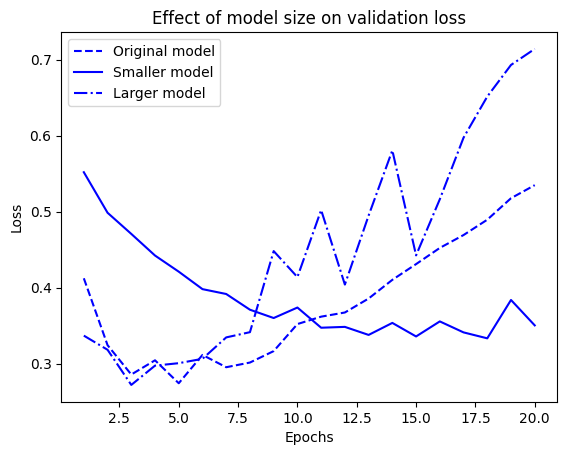

In [20]:
# add validation comparison chart
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
            label="Original model")
plt.plot(epochs, val_loss_smaller, "b-",
            label="Smaller model")
plt.plot(epochs, val_loss_larger, "b-.",
            label="Larger model")
plt.title("Effect of model size on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("../pngs/5ch/model-size.png")
# plt.close()
plt.show()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [21]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6136 - accuracy: 0.7752 - val_loss: 0.4770 - val_accuracy: 0.8658
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4105 - accuracy: 0.8898 - val_loss: 0.3939 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3379 - accuracy: 0.9115 - val_loss: 0.3864 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3025 - accuracy: 0.9221 - val_loss: 0.3579 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2790 - accuracy: 0.9318 - val_loss: 0.3586 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2633 - accuracy: 0.9356 - val_loss: 0.3600 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2554 - accuracy: 0.9378 - val_loss: 0.3708 - val_accuracy: 0.8818
Epoch 8/20
30

**Different weight regularizers available in Keras**

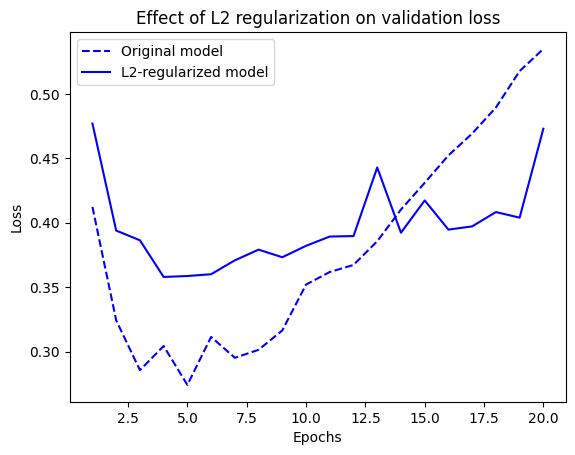

In [24]:
# add val comparison for regularization
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
            label="Original model")
plt.plot(epochs, val_loss_l2_reg, "b-",
            label="L2-regularized model")
plt.title("Effect of L2 regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("../pngs/5ch/l2-reg.png")
# plt.close()
plt.show()


#### Adding dropout

**Adding dropout to the IMDB model**

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6259 - accuracy: 0.6509 - val_loss: 0.4927 - val_accuracy: 0.8497
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4964 - accuracy: 0.7857 - val_loss: 0.3915 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4114 - accuracy: 0.8343 - val_loss: 0.3378 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3561 - accuracy: 0.8669 - val_loss: 0.3016 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3113 - accuracy: 0.8867 - val_loss: 0.2988 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2658 - accuracy: 0.9065 - val_loss: 0.2771 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2351 - accuracy: 0.9187 - val_loss: 0.2806 - val_accuracy: 0.8883
Epoch 8/20
30

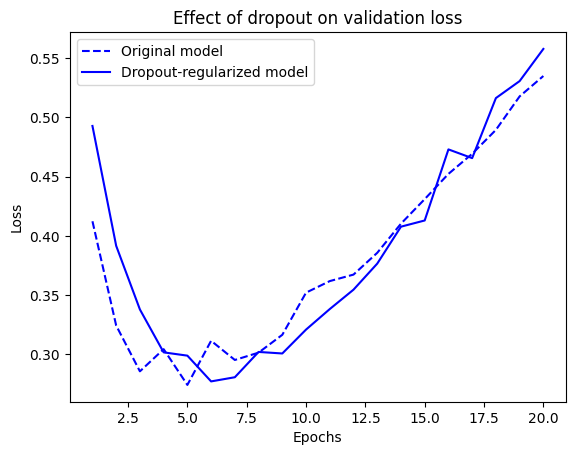

In [26]:
# add graph for validation
import matplotlib.pyplot as plt
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
            label="Original model")
plt.plot(epochs, val_loss_dropout, "b-",
            label="Dropout-regularized model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("../pngs/5ch/dropout.png")
# plt.close()
plt.show()


## Summary